<a href="https://colab.research.google.com/github/DHARUN033/Gold-Price/blob/main/GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Gold Price.csv to Gold Price.csv


In [ ]:
df = pd.read_csv('Gold Price.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').reset_index(drop=True)

In [ ]:
df = df.drop_duplicates(subset='Date')

In [ ]:
for col in ['Price','Open','High','Low','Volume','Chg%']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2848 non-null   datetime64[ns]
 1   Price   2848 non-null   int64         
 2   Open    2848 non-null   int64         
 3   High    2848 non-null   int64         
 4   Low     2848 non-null   int64         
 5   Volume  2848 non-null   int64         
 6   Chg%    2848 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 155.9 KB


In [ ]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Volume,0
Chg%,0


In [ ]:
df = df.dropna(subset=['Date','Price'])

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
df.shape

(2848, 7)

In [ ]:
df.size

19936

In [ ]:
df.ndim

2

In [ ]:
df.describe()

,Date,Price,Open,High,Low,Volume,Chg%
count,2848,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,2019-06-25 06:53:05.393258496,41221.788624,41223.038975,41443.228230,41002.117275,12592.610253,0.037324
min,2014-01-01 00:00:00,24545.000000,24583.000000,24635.000000,24470.000000,0.000000,-5.980000
25%,2016-09-15 18:00:00,29168.750000,29154.000000,29294.500000,29002.000000,6307.500000,-0.380000
50%,2019-06-25 12:00:00,33939.000000,33945.000000,34229.500000,33743.000000,10830.000000,0.040000
75%,2022-03-30 06:00:00,50824.000000,50819.000000,51071.000000,50551.000000,16472.500000,0.460000
max,2025-01-06 00:00:00,79257.000000,79264.000000,79999.000000,78888.000000,106920.000000,5.300000
std,NaN,14374.500657,14375.130049,14451.199655,14300.609162,10643.504531,0.829900


In [ ]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55
...,...,...,...,...,...,...,...
2843,2024-12-31,76232,75680,76970,75572,1920,0.95
2844,2025-01-01,76214,76232,76302,76053,60,-0.02
2845,2025-01-02,76849,76849,76849,76849,0,0.83
2846,2025-01-03,76813,77246,78600,76613,60,-0.05


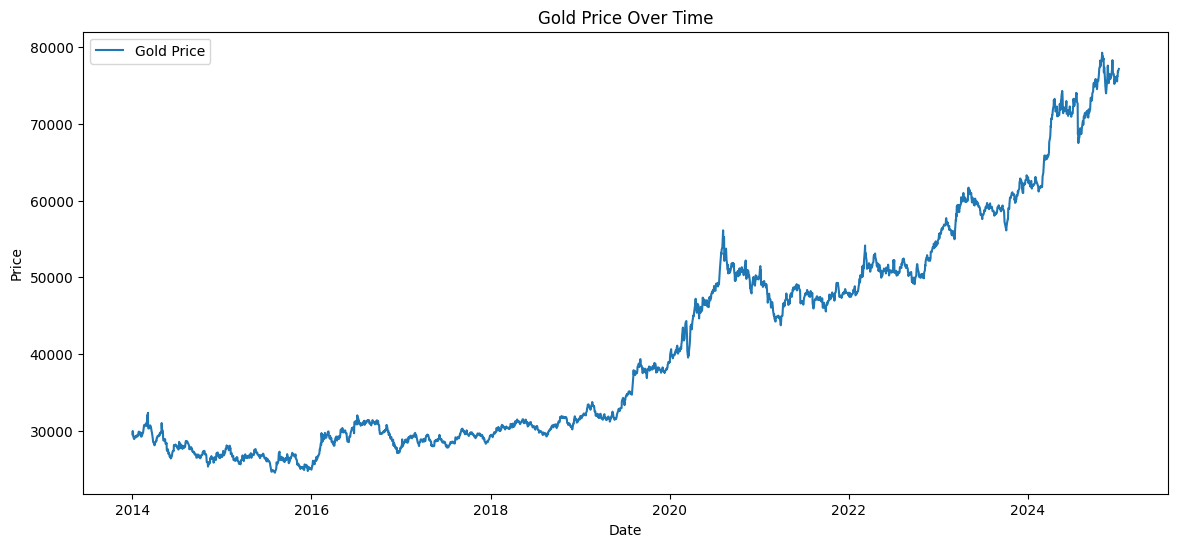

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Price'], label='Gold Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
import plotly.express as px
fig_line = px.line(df, x='Date', y='Price', title='Gold Price Over Time')
fig_line.update_traces(line=dict(color='red'))
fig_line.update_layout(xaxis_showgrid=False)
fig_line.update_layout(yaxis_showgrid=False)
fig_line.show()

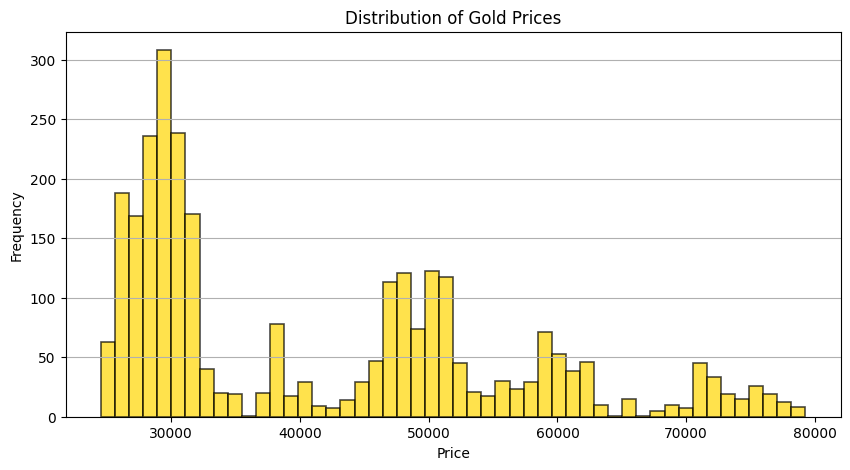

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['Price'], bins=50, alpha=0.7, color='gold', edgecolor='black', linewidth=1.2)
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
fig_hist_edges = px.histogram(df, x='Price', nbins=50, title='Distribution of Gold Prices', color_discrete_sequence=['gold'])
fig_hist_edges.update_traces(marker=dict(line=dict(width=1.2, color='black')))
fig_hist_edges.update_layout(yaxis_showgrid=False)
fig_hist_edges.show()

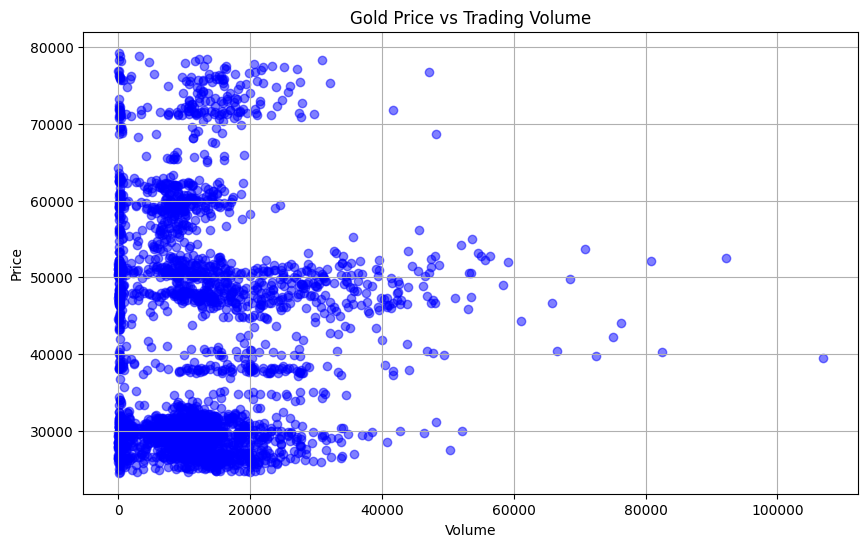

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Volume'], df['Price'], alpha=0.5, color='blue')
plt.title('Gold Price vs Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [ ]:
fig_scatter = px.scatter(df, x='Volume', y='Price', title='Gold Price vs Trading Volume', color='Price', color_continuous_scale='Viridis')
fig_scatter.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
for lag in range(1, 6):
    df[f'lag_{lag}'] = df['Price'].shift(lag)


In [ ]:
X = df[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['Price']

X = X.dropna()
y = y.loc[X.index]

In [ ]:
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Root Mean Squared Error (RMSE): 481.43
Mean Absolute Error (MAE): 331.76


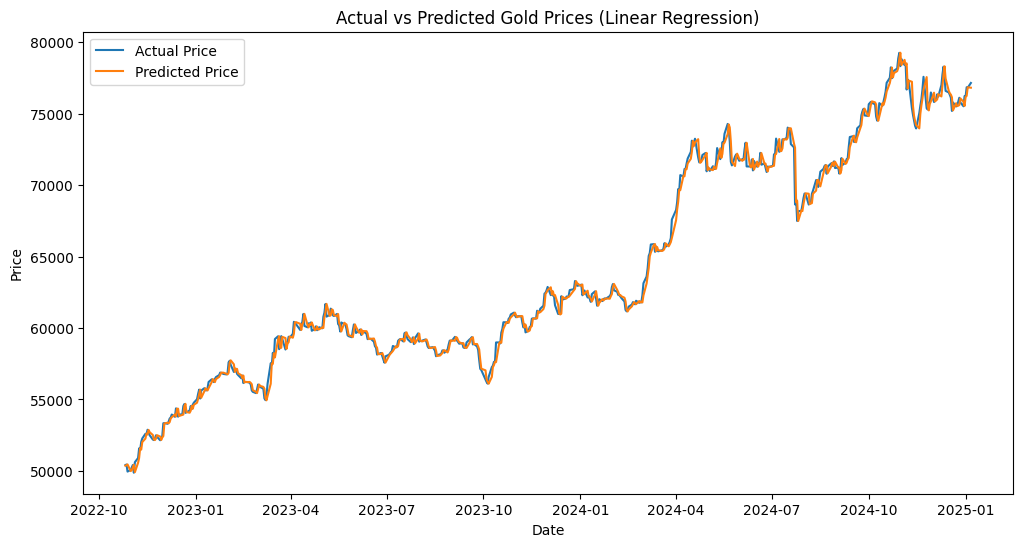

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'].loc[X_test.index], y_test, label='Actual Price')
plt.plot(df['Date'].loc[X_test.index], y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Gold Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
mean_target = df['Price'].mean()
print("Average target value:", mean_target)


Average target value: 41221.78862359551


In [ ]:
df = df.dropna()

In [ ]:
from google.colab import files
df.to_csv('processed_gold_data.csv', index=False)
files.download('processed_gold_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>